# [ICTCOG AI Academy] 7기 고급시각저녁반

#  다양한 영상 처리 라이브러리 (3) - OPENCV (2)


### 머신러닝 

In [ ]:
from sklearn.datasets import load_iris, load_digits

In [ ]:
import pandas as pd # 정형 데이터 

features, target을 하나의 테이블로 관리

In [ ]:
iris= load_iris()
iris_pd = pd.DataFrame(iris.data , columns = iris.feature_names)
iris_pd['target']= iris.target

In [ ]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Exploratory Data Analysis (EDA)
- 탐색적 데이터 분석
- 데이터에 대한 이해를 바탕으로 기계학습 성능 향상



In [ ]:
import seaborn as sns

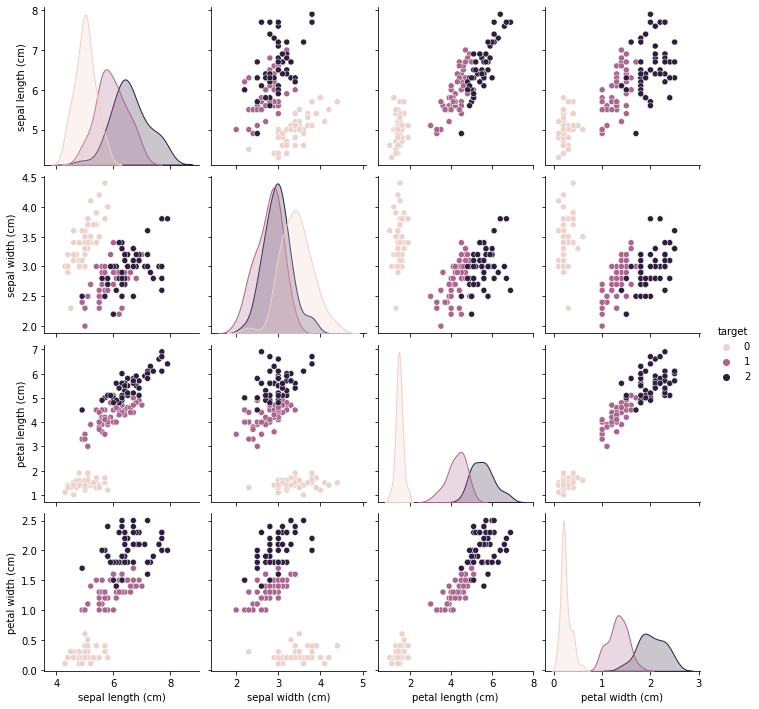

In [ ]:
sns.pairplot(iris_pd, hue='target')  #target으로 색상 구분

### tidy data
- 데이터 분석에 알 맞은 데이터 형태 (기본 포맷)
> Tidy Data by Hadley Wickham

- 하나의 행은 하나의 관측치 observation/sample
- 순서가 바뀌어도 상관 없음
- 값은 atomic (분해 불가)
  - 언어: 동일한 크기로 만들어 주기 위해서 padding

##### Image
1. 2차 이상의 데이터를 1차로 변환함으로써 생기는 정보 손실      
     - 데이터 하나를 하나의 벡터로 표현 가능하나 이미지는 비정형 데이터이므로 local dependency가 깨짐. 
    - 이미지에서는 거리가 가까울수록 관련성 높다고 가정

2.  컬럼(차원) 증가로 **차원의 저주** 
    - features 가 데이터에 비해 많을 수록 설명력은 높으나 **overfitting** 문제
3. feature 찾는법
- **convolution으로 해결**

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine=load_wine()
wine_pd = pd.DataFrame(wine.data, columns = wine.feature_names)  #178개의 데이터
wine_pd['target']= wine.target
wine_pd.info()

In [ ]:
print(wine.DESCR)   #통계치 ( 관측치 아님)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### PCA


> 오캄의 면도날
  - 동일한 성능이면 모델은 간단할수록 좋음

### 차원을 줄이는 법 
1. 차원 축소 PCA
2. Feature Selection

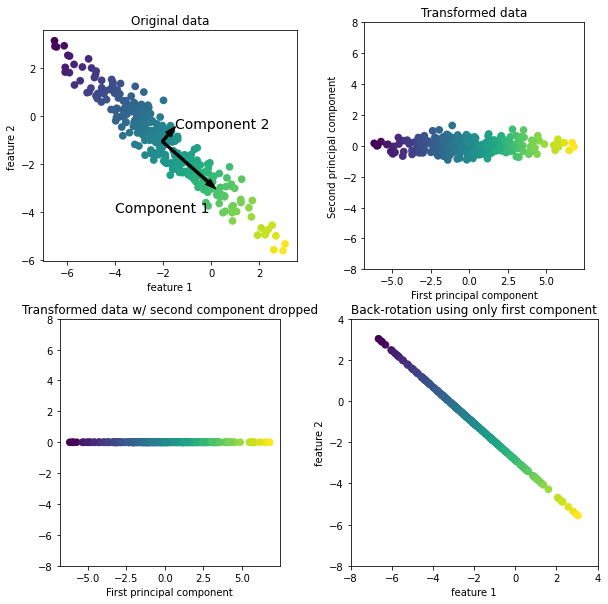

In [ ]:
import mglearn
mglearn.plot_pca.plot_pca_illustration()  

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(3)

In [ ]:
pca.fit_transform(iris_pd.iloc[:,:-1])  # 특성을 유지하면서 3개의 주성분으로 줄임 

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

### feature selection
1. filter
- 통계값을 이용해서 관련성 높은 feature 선택 

In [ ]:
from sklearn.feature_selection  import chi2, SelectKBest

In [ ]:
sb= SelectKBest( chi2,k=3)

In [ ]:
sb.fit_transform(iris_pd.iloc[:,:-1], iris_pd.target)  

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

2. wrapper
- 알고리즘과 데이터 셋을 wrapping 시켜서 성능 가장 좋은 k개 찾음


In [ ]:
from sklearn.feature_selection  import  RFE

In [ ]:
rfe=RFE(DecisionTreeClassifier(),n_features_to_select=8)
rfe.fit_transform(wine_pd.iloc[:,:-1],wine_pd.target)

array([[1.423e+01, 3.060e+00, 2.800e-01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 2.760e+00, 2.600e-01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 3.240e+00, 3.000e-01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 6.900e-01, 4.300e-01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 6.800e-01, 5.300e-01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 7.600e-01, 5.600e-01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

3.  embedded 
  - importance(중요도)에 따라서 선택 
  - 지원하는 알고리즘이 정해져 있음 (예. Decision Tree)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc =RandomForestClassifier()

In [ ]:
rfc.fit(iris_pd.iloc[:,:-1], iris_pd.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.feature_importances_ #0.47607548 가장 큼 

array([0.1048803 , 0.02072788, 0.39831634, 0.47607548])

### feature scailing
-  특징이 잘 나타나도록  데이터를 속성을 유지한채 변형
 - MinMaxScaler : 경사하강 잘 되도록 사용

- 이미지 processing 통해서 숨어있는 특징을 찾음
- 이미지 고유 특징때문에 전처리하는 방식이 다름


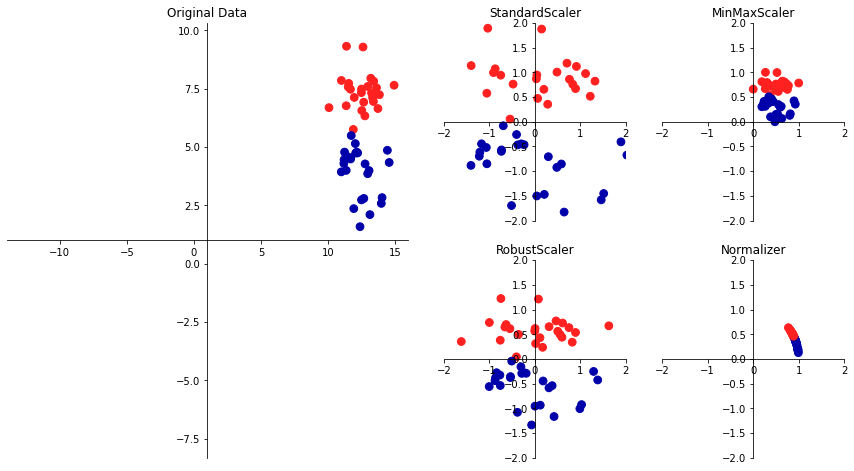

In [ ]:
mglearn.plot_scaling.plot_scaling()

[TensorFlow Playground](https://playground.tensorflow.org/)

### Feature 
#### 딥러닝, 머신러닝의 차이 
- ML : 원래의 데이터에서 **특성을 사람이 추출**
- DL : **학습을 통해서 특성 추출**
  - feature 통해서 - >효율적


In [ ]:
digit = load_digits()
digit_pd = pd.DataFrame(digit.data )
digit_pd['target'] = digit.target
digit_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
digit_pd.loc[0][:-1].values.reshape(8,8)  #2차원으로 reshape

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

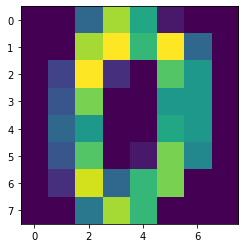

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(digit_pd.loc[0][:-1].values.reshape(8,8))

In [ ]:
digit_pd.loc[0]

0      0.0
1      0.0
2      5.0
3     13.0
4      9.0
      ... 
59    13.0
60    10.0
61     0.0
62     0.0
63     0.0
Name: 0, Length: 64, dtype: float64

### laerning curve
- epochs 
- **데이터 크기**

In [ ]:
from sklearn.model_selection import learning_curve

### 머신러닝

In [ ]:
from sklearn.tree import DecisionTreeClassifier #binary 

In [ ]:
from sklearn.model_selection import train_test_split #holdout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digit_pd.iloc[:,:-1],digit.target)

In [ ]:
dt= DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train ) #학습

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.score(X_test, y_test)  #82%

0.82

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(X_test, y_test) #95% 

0.9533333333333334

In [ ]:
from sklearn.feature_extraction import #자연어 

### OpenCV 
- **CV**를 위한 **전통적인 알고리즘, 머신러닝, 딥러닝** 방법 지원


In [ ]:
import cv2

In [ ]:
cv2.ml #머신러닝 패키지

<module 'cv2.ml'>

In [ ]:
dir(cv2.ml) #ANN 인공신경망(MLP) , Boost. DT, EM, logistic, naive bayes, SVM etc

['ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAREST_KDTREE',
 'KNearest_BRUTE_FORCE',
 '

In [ ]:
cv2.dnn #Deep neural network

- Scikit-learn 에서는 instance 해서 동일하게 사용했었음

### OpenCV의 KNN 
- 학습이 아닌 instance/case based learning 
- 가장 가까운 k개의 이웃 데이터 확인
 

In [ ]:
#KNN
import numpy as np
train_data = np.random.randint( 0,100 , (25,2) )
train_data

array([[20, 83],
       [18, 26],
       [42, 23],
       [56, 71],
       [98, 78],
       [99, 79],
       [ 8,  8],
       [56, 14],
       [48, 95],
       [85, 44],
       [ 9, 73],
       [61, 34],
       [98, 33],
       [70, 78],
       [33, 21],
       [99, 70],
       [73, 72],
       [68,  0],
       [95, 84],
       [66, 77],
       [ 6, 17],
       [57, 84],
       [27, 37],
       [15,  2],
       [54, 45]])

In [ ]:
# binary classification 
target_data= np.random.randint( 0,2,(25,1))
target_data

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

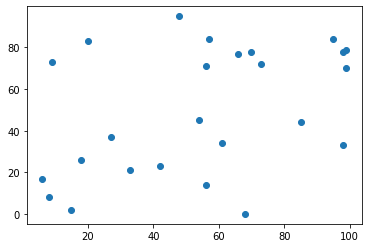

In [ ]:
plt.scatter(train_data[:,0],train_data[:,1])  #train 데이터를 scatter plot

In [ ]:
target_data.flatten()==0  #copy , view와 같음
target_data.ravel()==0 

array([ True, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False, False, False])

In [ ]:
train_data[target_data.ravel()==0]  #boolean indexing 으로 추출

array([[20, 83],
       [42, 23],
       [56, 71],
       [98, 78],
       [48, 95],
       [85, 44],
       [ 9, 73],
       [70, 78],
       [99, 70],
       [73, 72],
       [66, 77],
       [ 6, 17]])

In [ ]:
red = train_data[target_data.ravel()==0]
blue =train_data[target_data.ravel()==1]

In [ ]:
np.c_[ train_data, target_data] #target값과 데이터를 합침

array([[20, 83,  0],
       [18, 26,  1],
       [42, 23,  0],
       [56, 71,  0],
       [98, 78,  0],
       [99, 79,  1],
       [ 8,  8,  1],
       [56, 14,  1],
       [48, 95,  0],
       [85, 44,  0],
       [ 9, 73,  0],
       [61, 34,  1],
       [98, 33,  1],
       [70, 78,  0],
       [33, 21,  1],
       [99, 70,  0],
       [73, 72,  0],
       [68,  0,  1],
       [95, 84,  1],
       [66, 77,  0],
       [ 6, 17,  0],
       [57, 84,  1],
       [27, 37,  1],
       [15,  2,  1],
       [54, 45,  1]])

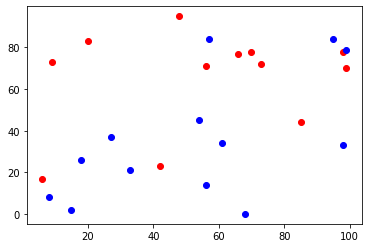

In [ ]:
plt.scatter(red[:,0],red[:,1], color='red')   
plt.scatter(blue[:,0],blue[:,1], color='blue')

In [ ]:
prediction = np.random.randint(0,100,(1,2))
prediction

array([[90, 67]])

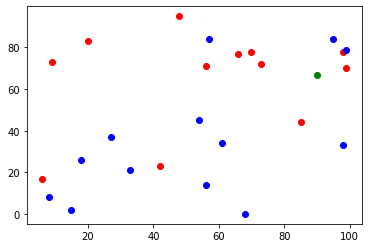

In [ ]:
plt.scatter(red[:,0],red[:,1], color='red')   
plt.scatter(blue[:,0],blue[:,1], color='blue')

plt.scatter(prediction[:,0],prediction[:,1], color='green') 

In [ ]:
for i in dir(cv2.ml):
  if 'KN' in i: #ml패키지 내의 KNN찾기
    print(i)

KNEAREST_BRUTE_FORCE
KNEAREST_KDTREE
KNearest_BRUTE_FORCE
KNearest_KDTREE
KNearest_create
KNearest_load


- 대문자 : 상수
- `KNearest_create , KNearest_load` 함수

모델을 하나로 만들어 놓으면 활용 
- 객체지향 아님

In [ ]:
knn =cv2.ml.KNearest_create() #KNN 알고리즘 

In [ ]:
dir(knn)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'calcError',
 'clear',
 'create',
 'empty',
 'findNearest',
 'getAlgorithmType',
 'getDefaultK',
 'getDefaultName',
 'getEmax',
 'getIsClassifier',
 'getVarCount',
 'isClassifier',
 'isTrained',
 'load',
 'predict',
 'read',
 'save',
 'setAlgorithmType',
 'setDefaultK',
 'setEmax',
 'setIsClassifier',
 'train',
 'write']

In [ ]:
knn.train # train(trainData [, flags])

<function ml_KNearest.train>

- ROW_SAMPLE : 각 관측치는 행
- COL_SAMPLE : 각 관측치는 열



In [ ]:
knn.train(train_data, cv2.ml.ROW_SAMPLE,target_data) #데이터 타입 float으로 변경해야함

error: ignored

In [ ]:
train_data=train_data.astype('f4')
target_data=target_data.astype('f4')
prediction=prediction.astype('float32')

In [ ]:
knn.train(train_data, cv2.ml.ROW_SAMPLE,target_data) #

True

In [ ]:
knn.findNearest(prediction, 2) #

(0.0,
 array([[0.]], dtype=float32),
 array([[0., 0.]], dtype=float32),
 array([[ 90., 185.]], dtype=float32))

In [ ]:
a,b,c,d = knn.findNearest(prediction, 2)   #  예측 class ,k개 이웃들 ,거리

#### Scikit-learn의 KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn2= KNeighborsClassifier(3)

In [ ]:
vars(knn2)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'radius': None,
 'weights': 'uniform'}

In [ ]:
knn2.fit(train_data , target_data)  #ravel() -1차원화

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn2.fit(train_data , target_data.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn2.fit(train_data , target_data.reshape(-1)) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn2.predict(prediction)

array([0.], dtype=float32)

In [ ]:
vars(knn2)  #학습 후에 knn2의 vars 값으로 설명 추가됨 

{'_fit_X': array([[20., 83.],
        [18., 26.],
        [42., 23.],
        [56., 71.],
        [98., 78.],
        [99., 79.],
        [ 8.,  8.],
        [56., 14.],
        [48., 95.],
        [85., 44.],
        [ 9., 73.],
        [61., 34.],
        [98., 33.],
        [70., 78.],
        [33., 21.],
        [99., 70.],
        [73., 72.],
        [68.,  0.],
        [95., 84.],
        [66., 77.],
        [ 6., 17.],
        [57., 84.],
        [27., 37.],
        [15.,  2.],
        [54., 45.]], dtype=float32),
 '_fit_method': 'kd_tree',
 '_tree': <sklearn.neighbors._kd_tree.KDTree at 0x674b718>,
 '_y': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1]),
 'algorithm': 'auto',
 'classes_': array([0., 1.], dtype=float32),
 'effective_metric_': 'euclidean',
 'effective_metric_params_': {},
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'n_samples_fit_': 25,
 'outputs_2d_': False,
 'p'

### linear regression
- 선형 회귀



In [ ]:
from sklearn.datasets import load_boston  # 보스턴의 집값 예측 

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(boston.data, boston.target) #학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#가짜 데이터 생성
x = np.linspace(0,10,100)
y_hat = x*3 +5

In [ ]:
y= x*3+20*(np.random.rand(x.size)-0.5) + 0.5

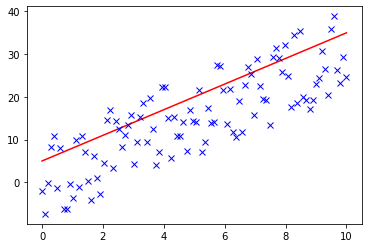

In [ ]:
plt.plot(x,y_hat,'r') 
plt.plot(x,y, 'bx')  

In [ ]:
dir(cv2.ml)

['ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAREST_KDTREE',
 'KNearest_BRUTE_FORCE',
 '

In [ ]:
np.c_[x,y] # 데이터 합치기

cv2.fitLine (  np.c_[x,y] , cv2.DIST_L1, 0, 0.1 ,0.1 ) # 값을 이음.

array([[ 0.2064352 ],
       [ 0.97846025],
       [ 7.7751517 ],
       [29.061272  ]], dtype=float32)

In [ ]:
for i in dir(cv2):
  if 'DIST' in i:
    print(i)

CALIB_FIX_TANGENT_DIST
CALIB_ZERO_TANGENT_DIST
CAP_PROP_XI_LENS_FOCUS_DISTANCE
DIST_C
DIST_FAIR
DIST_HUBER
DIST_L1
DIST_L12
DIST_L2
DIST_LABEL_CCOMP
DIST_LABEL_PIXEL
DIST_MASK_3
DIST_MASK_5
DIST_MASK_PRECISE
DIST_USER
DIST_WELSCH


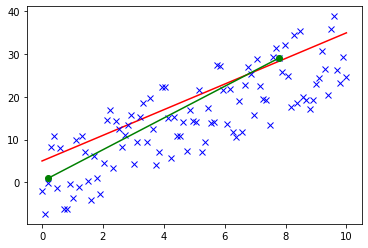

In [ ]:
plt.plot(x,y_hat,'r') 
plt.plot(x,y, 'bx')  
plt.plot([ 0.2064352 , 7.7751517  ],[ 0.97846025 ,29.061272  ], 'g-o')

Scikit : 범용적 툴
- prototype으로 많이 사용
- 추상화가 아닌 알고리즘 특성마다 다름 


### Logistic Regression 
- logit 을 이용해서 이진 분류 문제 해결 
- 다중분류에서는 one vs rest, one vs one 방식으로 voting


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris= load_iris()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr.fit(iris.data, iris.target) #클래스가 3개인데 학습이 됨

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.predict([[3,3,3,3]])

array([2.24423047])

쉽게 사용가능해서 위와 같은 실수해도 에러 발생하지 않음

In [ ]:
from sklearn.multiclass import OneVsOneClassifier 

In [ ]:
ovo = OneVsOneClassifier(LogisticRegression())

In [ ]:
ovo.fit(iris.data, iris.target)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

In [ ]:
ovo.predict([[3,3,3,3]])

array([1])

### OneVsRest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovr= OneVsRestClassifier(LogisticRegression())

In [ ]:

idx=iris.target !=2 
data=iris.data[idx]

In [ ]:
data.dtype

dtype('float64')

In [ ]:
data= iris.data[idx].astype('f4')
target=iris.target[idx].astype('f4')

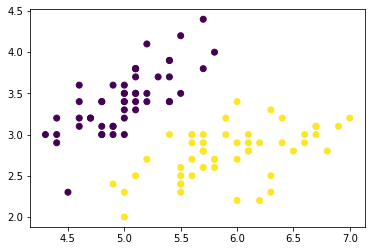

In [ ]:
plt.scatter(data[:,0],data[:,1],c=target)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [ ]:
for i in dir(cv2.ml):
  if 'LOG' in i:  #case sensitive
    print(i)

BOOST_LOGIT
Boost_LOGIT
LOGISTIC_REGRESSION_BATCH
LOGISTIC_REGRESSION_MINI_BATCH
LOGISTIC_REGRESSION_REG_DISABLE
LOGISTIC_REGRESSION_REG_L1
LOGISTIC_REGRESSION_REG_L2


In [ ]:
for i in dir(cv2.ml): 
  if '_create' in i:
    print(i)

ANN_MLP_create
Boost_create
DTrees_create
EM_create
KNearest_create
LogisticRegression_create
NormalBayesClassifier_create
ParamGrid_create
RTrees_create
SVMSGD_create
SVM_create
TrainData_create


In [ ]:
for i in dir(cv2.ml):
  if 'log' in i.lower():  #소문자로 변경해서 찾음
    print(i)

BOOST_LOGIT
Boost_LOGIT
LOGISTIC_REGRESSION_BATCH
LOGISTIC_REGRESSION_MINI_BATCH
LOGISTIC_REGRESSION_REG_DISABLE
LOGISTIC_REGRESSION_REG_L1
LOGISTIC_REGRESSION_REG_L2
LogisticRegression_BATCH
LogisticRegression_MINI_BATCH
LogisticRegression_REG_DISABLE
LogisticRegression_REG_L1
LogisticRegression_REG_L2
LogisticRegression_create
LogisticRegression_load


In [ ]:
lr = cv2.ml.LogisticRegression_create()

In [ ]:
lr.train(X_train,cv2.ml.ROW_SAMPLE, y_train) 

True

In [ ]:
lr=LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
lr.set_params(C=2) #파라미터 값 지정 

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.set_params(**{'C':2.0})

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr=cv2.ml.LogisticRegression_create()
lr.setIterations(100) # set으로 설정

In [ ]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [ ]:
lr.get_learnt_thetas()  #과거형

array([[-2.7080967e-05,  1.5495691e-04, -2.9275744e-04,  8.4736891e-04,
         3.3554481e-04]], dtype=float32)

In [ ]:
lr.predict()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report #문제별로 성능척도 상이

In [ ]:
len(lr.predict(X_train)) #2개

2

In [ ]:
lr.predict(X_train)[0]

1.0

In [ ]:
lr.predict(X_train)[1]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
np.sum(lr.predict(X_train)[1] ==y_train)

2700

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lr.predict(X_test)[1]) #56% 의 정확도

0.56

- OpenCV는 계속 사용해서 비교할 예정
- TF 모델을 OpenCV에 불러와서 실행
- 논문